In [1]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Auto_Dataset.csv")

In [4]:
df.head()

,dateCrawled,Name,Price,Ab_test,Vehicle_type,Registration_year,Gearbox,Power_PS,Model,Kilometer,Registration_month,fuel_type,brand,Unrepaired_damage,Date_created,Postal_code,Last_seen
0,2016-03-17 16:54:00,GOLF_4_1_4__3TÜRER,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17,91074,2016-03-17 17:40:00
1,2016-03-31 17:25:00,Skoda_Fabia_1.4_TDI_PD_Classic,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31,60437,2016-06-04 10:17:00
2,2016-04-04 17:36:00,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04,33775,2016-06-04 19:17:00
3,2016-01-04 20:48:00,Peugeot_206_CC_110_Platinum,2200,test,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-01-04,67112,2016-05-04 18:18:00
4,2016-03-26 19:54:00,Mazda_3_1.6_Sport,2000,control,limousine,2004,manuell,105,3_reihe,150000,12,benzin,mazda,nein,2016-03-26,96224,2016-06-04 10:45:00


###  Can you tell me No of Vehicles by Brand Available on ebay sfor ale with the help of visualization

In [5]:
df['brand'].nunique()

39

In [6]:
df['brand'].value_counts()

volkswagen       51782
bmw              29258
mercedes_benz    25594
opel             24666
audi             23962
ford             16362
renault          10691
peugeot           7464
fiat              5949
seat              4800
skoda             4394
mazda             3845
toyota            3536
citroen           3477
nissan            3329
smart             3199
mini              2819
hyundai           2670
volvo             2476
mitsubishi        1942
honda             1849
kia               1840
porsche           1823
alfa_romeo        1624
suzuki            1599
chevrolet         1258
chrysler           948
dacia              690
land_rover         608
jeep               590
subaru             522
daihatsu           473
jaguar             467
saab               407
daewoo             303
lancia             302
rover              245
trabant            167
lada               128
Name: brand, dtype: int64

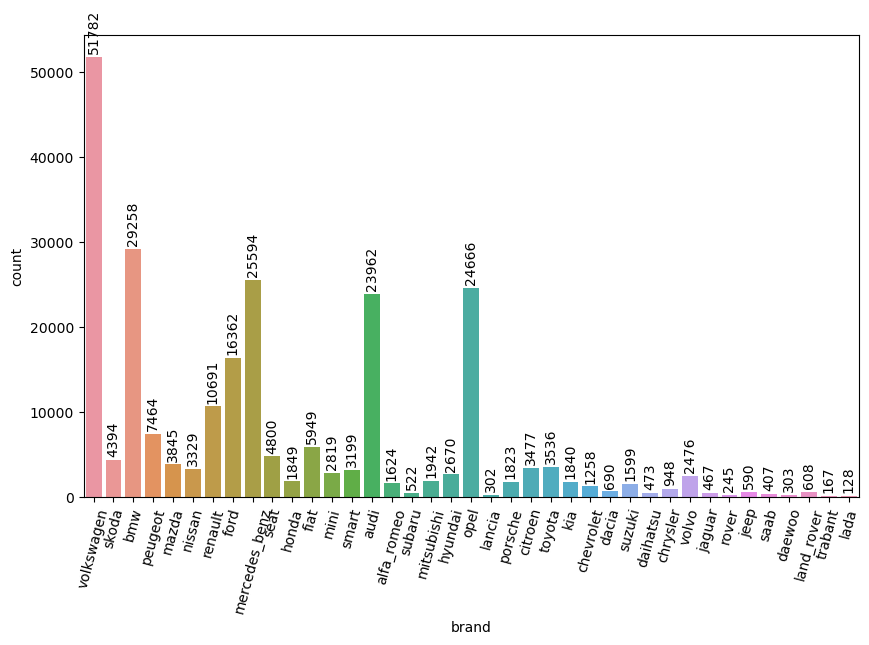

In [7]:
plt.figure(figsize = (10,6))
ax =sns.countplot(data = df,x= 'brand')
plt.xticks(rotation = 75)
ax.bar_label(ax.containers[0],padding =2,label_type = 'edge',rotation = 90)
plt.show()

In [ ]:
Summary :
    Total Number of Vehicle Brands 39 avabliable for ebay sale
    - volkswagen has the high sale with the 51782 total e-bay sales
    - Lada has the less sale with the 128 total e-bay sales

### What is the Average price for vehicles based on the type of vehicle as well as on the type of gearbox.Explain me with both numerical and visualization analysis

In [9]:
df.head(2)

,dateCrawled,Name,Price,Ab_test,Vehicle_type,Registration_year,Gearbox,Power_PS,Model,Kilometer,Registration_month,fuel_type,brand,Unrepaired_damage,Date_created,Postal_code,Last_seen
0,2016-03-17 16:54:00,GOLF_4_1_4__3TÜRER,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17,91074,2016-03-17 17:40:00
1,2016-03-31 17:25:00,Skoda_Fabia_1.4_TDI_PD_Classic,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31,60437,2016-06-04 10:17:00


In [11]:
pd.crosstab(df['Vehicle_type'],df['Gearbox'],df['Price'],aggfunc = 'mean')

Gearbox,automatik,manuell
Vehicle_type,,
andere,9244.687075,4263.315209
bus,11473.953027,6870.190312
cabrio,16875.366283,9396.056535
coupe,41056.222664,12064.847352
kleinwagen,4432.856416,3141.868559
kombi,9737.980720,8419.553784
limousine,15663.915074,5718.854129
suv,17692.236860,10803.672497


<Axes: xlabel='Gearbox', ylabel='Vehicle_type'>

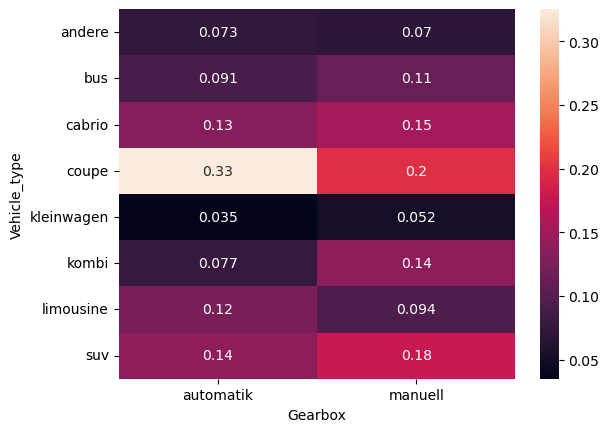

In [14]:
sns.heatmap(pd.crosstab(df['Vehicle_type'],df['Gearbox'],df['Price'],aggfunc = 'mean',normalize = 'columns'),annot = True)

In [ ]:
Summary :

    Coupe Vehicle-Type has high average Price of 39872 for Automatic and 11645 for Manual gearbox
    Suv Vehicle-Type has next high Average Price of 17405  for Automatic  and 10610 for Manual gearbox 
    Kleinwagen Vehicle-Type has low Average Price of 4266 for Automatic and 3008 for Manual gearbox
    
    So, we conclude that Coupe and Suv vehicles have high Price for both Automatic and Manual gearbox compare to others
    Kleinwagen vehicle has low Price in both Automatic and Manual gearbox
    

### What is the marginal probability of private seller

In [17]:
df['seller'].value_counts()

privat        260896
gewerblich         2
Name: seller, dtype: int64

In [29]:
pd.crosstab(index = df['seller'],columns=df['seller'],normalize='all',margins= True,margins_name = "Marginal probability")

seller,gewerblich,privat,Marginal probability
seller,,,
gewerblich,0.000008,0.000000,0.000008
privat,0.000000,0.999992,0.999992
Marginal probability,0.000008,0.999992,1.000000


In [ ]:
summary :
    marginal probability of private seller is 0.999992